# Single Frame Dataset

**Iteration 4 hypothesis**: one single frame over a LESCO sign is sufficient for recognition using similarity measures. Therefore, this notebook will select from each video one single frame for each video. Each image will be augmented and saved into a csv.

The selected frame for each video must contain the hands position that is the most "relevant" for recognition. This criteria is selected by a human.

In [10]:
import numpy as np
import cv2 as cv
import mediapipe as mp
import matplotlib.pyplot as plt
import lesco as lsc # file from iteration 3 now with new method!
from sklearn.decomposition import TruncatedSVD

## Example Frame 14 of video "Agredir_1"

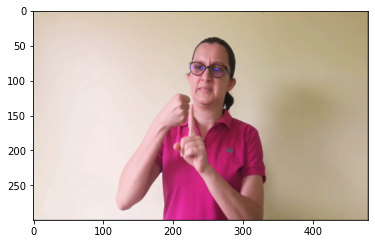

In [11]:
# example of a single frame of a LESCO video
url = "14.png"
img = cv.imread(url)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

### Image converted to Time Series

In [12]:
svd = TruncatedSVD(n_components=1) 
hands_array = lsc.get_hands(img, svd)

Agredir has dimension (42,)


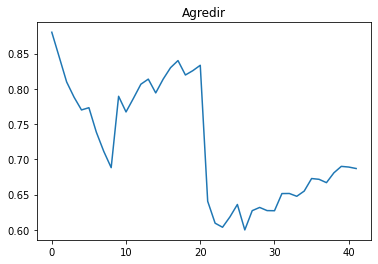

In [13]:
plt.title("Agredir")
plt.plot(hands_array)
print("Agredir has dimension",hands_array.shape)

### Image Augmentation (flip and rotation)

In [14]:
# similar to process_video, but for a single image
def process_image(frame, flip = False, rotate = False, rotate_degree = 5):
    frame = cv.resize(frame, (480,300), interpolation = cv.INTER_AREA)  
    if flip:
        frame = cv.flip(frame, 1)
    if rotate:
        frame = lsc.rotate_image(frame, rotate_degree)
    svd = TruncatedSVD(n_components=1) 
    hands_array = lsc.get_hands(frame, svd)
    return hands_array

In [15]:
v1 = process_image(img, False, False, 0)
v2 = process_image(img, True, False, 0)
v3 = process_image(img, False, True, 5)
v4 = process_image(img, False, True, -5)
v5 = process_image(img, True, True, 5)
v6 = process_image(img, True, True, -5)

agredir = [v1,v2,v3,v4,v5,v6]

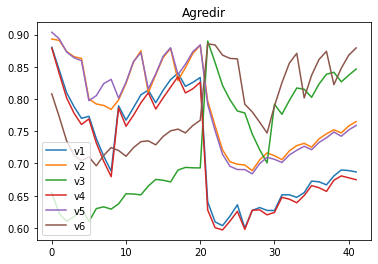

In [16]:
i = 1
for v in agredir:
    plt.title("Agredir")
    plt.plot(v, label = "v" + str(i))
    i += 1
plt.legend()

## Process Single Image with Lesco.py

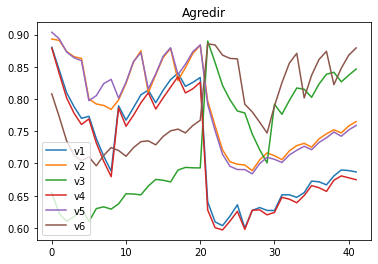

In [17]:
# process_image has been added to lesco.py

url = "14.png"
img = cv.imread(url)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

v1 = lsc.process_image(img, False, False, 0)
v2 = lsc.process_image(img, True, False, 0)
v3 = lsc.process_image(img, False, True, 5)
v4 = lsc.process_image(img, False, True, -5)
v5 = lsc.process_image(img, True, True, 5)
v6 = lsc.process_image(img, True, True, -5)

agredir = [v1,v2,v3,v4,v5,v6]

i = 1
for v in agredir:
    plt.title("Agredir")
    plt.plot(v, label = "v" + str(i))
    i += 1
plt.legend()